### Welcome to the Southern Water Corp Python Case Study!



**Please note that this case study is composed of two parts** — Descriptive statistics and inferential statistics. I looked at difefrent scenarios 1. Box plot when theres is pump failure and when there is no pump failure 2. Box plot by keeping outliers and removing outliers 3. Creating quartiles 4. Correlations among different variables using heatmaps 5. Correlations specifically with pump failure 6. Rolling standard deviation correlations of variables in the form of heatmap 7. Linear regression model predictions 8. Validation of the model 

### Let's get started!

## Part I: <span style="color:blue">Descriptive Statistics</span>


.### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. You will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodel.api** - This library will enable you to create statistical models. You will need this library when perfroming regession analysis in Part 2 of this case study.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import pandas as pd

import statsmodels.api as sm

import matplotlib as mpl




---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
Unfortunately, the data received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. Need to merge them into a complete dataframe for your analysis. To do this, follow the steps below: 

i. Import each of the three separate files and merge them into one dataframe.  Suggested names: **(dataframe_1, dataframe_2, dataframe_3)**. Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics on your combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on your combined dataframe. 

In [4]:
#import Souther water corp data
dataframe_1 = pd.read_csv("Desalination_Unit_File_001.csv", header=1)
dataframe_2 = pd.read_excel('Desalination_Unit_File_002.xlsx', header=1) 
dataframe_3 = pd.read_excel('Desalination_Unit_File_003.xlsx', header=1) 

#combining or merging dataframes
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dataframe = dataframe.dropna()

#print describe method and info
print(dataframe.describe())
print(dataframe.info())
dataframe.set_index('TIMEFRAME', inplace=True)

       SURJEK_FLOW_METER_1  SURJEK_FLOW_METER_2  ROTATIONAL_PUMP_RPM  \
count          6997.000000          6997.000000          6997.000000   
mean              5.947058             5.159499             6.608110   
std              20.352811            24.445774            20.844371   
min              -0.527344            -9.118652            -1.000000   
25%               0.000000            -4.765337            -0.687126   
50%               0.314582            -0.351562            -0.013292   
75%               0.704173             0.981556             0.000000   
max             127.221700           313.989300            99.000000   

       SURJEK_PUMP_TORQUE  MAXIMUM_DAILY_PUMP_TORQUE  \
count         6997.000000                6997.000000   
mean            39.097537                 427.357071   
std            124.182122                 473.256491   
min             -2.436085                  -2.278918   
25%             -2.030355                   9.283683   
50%            

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

Looking at dataframe, now able to see the upper and lower quartiles for each row of data. Also, now have a rough sense of the number of entires in each dataset. 

i) Create a boxplot from your combined dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

Text(0.5, 1.0, 'BoxPlot for all attributes')

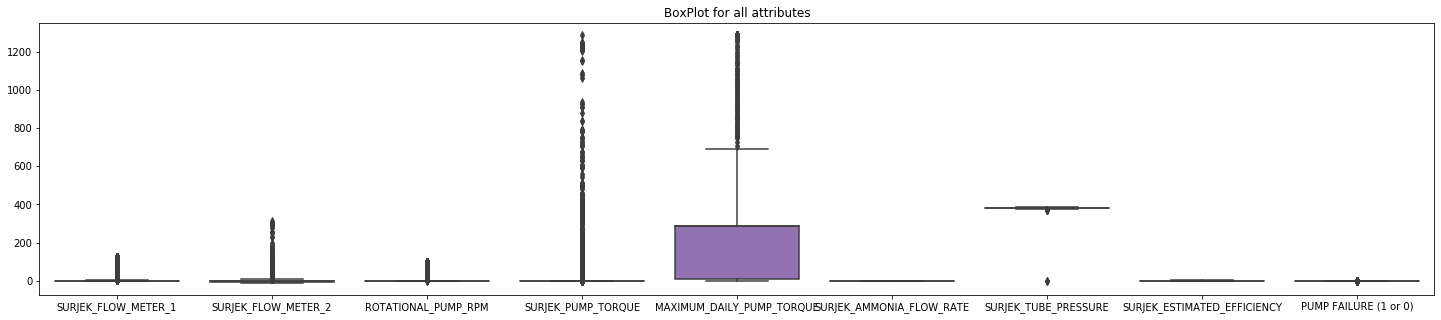

In [38]:
plt.rcParams['figure.figsize'] = (25,5)
sns.boxplot(data=dataframe)
plt.title("BoxPlot for all attributes")

#### Note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Remove these variables and look at the box plot again


---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  <span style="color:green">Step 3</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'. 

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'? surjek_tube_pressure and surjek_flow_meter_2

Text(0.5, 1.0, 'BoxPlot withot Pump Torque or Max Daily Pump Torque')

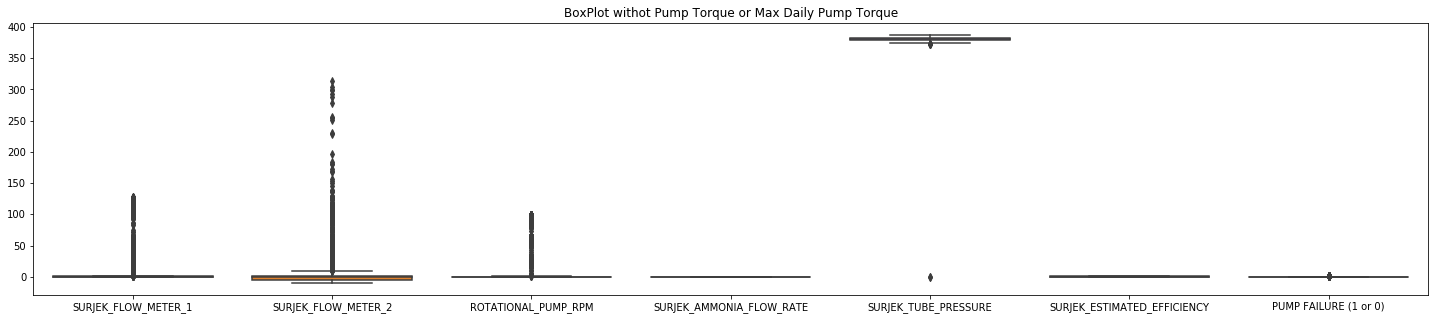

In [39]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)'] 
plt.rcParams['figure.figsize'] = (25,5)
dataframe_filt = dataframe[filt]
plt.rcParams['figure.figsize'] = (25,5)
sns.boxplot(data=dataframe_filt)
plt.title("BoxPlot without Pump Torque or Max Daily Pump Torque")

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). You will be creating two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset. 

Note: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.

**Open-ended Question:**
What variables seem to have the largest variation when the Pump has failed?
Surjek_flow_meter_2 


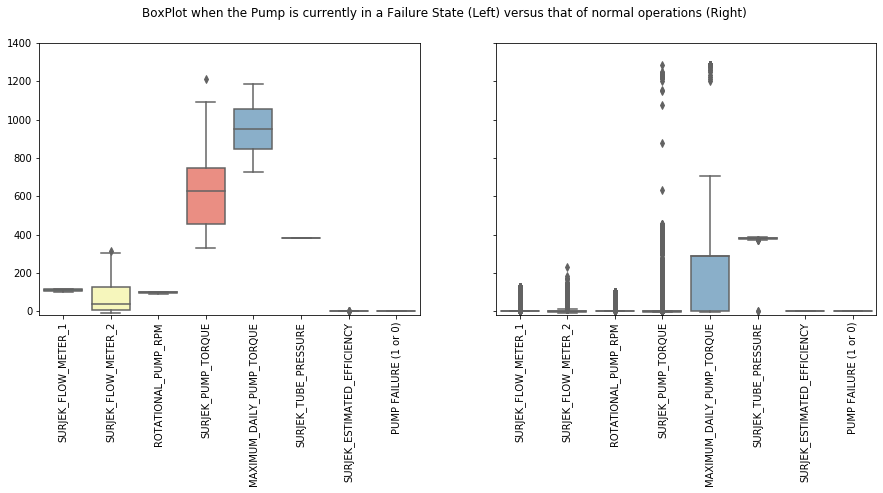

In [28]:
dataframe_boxplots = dataframe[dataframe['PUMP FAILURE (1 or 0)']==1]
plt.rcParams['figure.figsize'] = (15,5)
f, axes = plt.subplots(1, 2, sharey=True)

f.suptitle("BoxPlot when the Pump is currently in a Failure State (Left) versus that of normal operations (Right)")
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set3', ax=axes[0])

dataframe_boxplots = dataframe[dataframe['PUMP FAILURE (1 or 0)']==0]
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set3', ax=axes[1])

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,1400)
    plt.xticks(rotation=90)
    
plt.show()

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [20]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE               0.350032
MAXIMUM_DAILY_PUMP_TORQUE      276.315522
SURJEK_TUBE_PRESSURE             3.662100
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
dtype: float64


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure your dataframe doesn't include the attribute TIMEFRAME - if it does, please drop this attribute for now.


In [21]:
#dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3])
df = dataframe.dropna(how='any', axis=0)
#df = df.drop('TIMEFRAME', axis=1)
print(df.info())
print ("When we have not removed any outliers from the dataset, we have " + "11998" + " entries") 

no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(no_outliers.info())
print(no_outliers)
no_outliers.head()
df.head()

print ("When we have not removed any outliers from the dataset, we have " + "11998" + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + "one-third of dataframe")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6997 entries, 2014-09-12 00:00:00 to 2014-12-10 16:52:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SURJEK_FLOW_METER_1          6997 non-null   float64
 1   SURJEK_FLOW_METER_2          6997 non-null   float64
 2   ROTATIONAL_PUMP_RPM          6997 non-null   float64
 3   SURJEK_PUMP_TORQUE           6997 non-null   float64
 4   MAXIMUM_DAILY_PUMP_TORQUE    6997 non-null   float64
 5   SURJEK_TUBE_PRESSURE         6997 non-null   float64
 6   SURJEK_ESTIMATED_EFFICIENCY  6997 non-null   float64
 7   PUMP FAILURE (1 or 0)        6997 non-null   float64
dtypes: float64(8)
memory usage: 492.0 KB
None
When we have not removed any outliers from the dataset, we have 11998 entries
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3854 entries, 2014-09-12 02:34:00 to 2014-12-10 13:41:00
Data columns (total 8 columns):
 #   Column

---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. 


#### Note 2: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


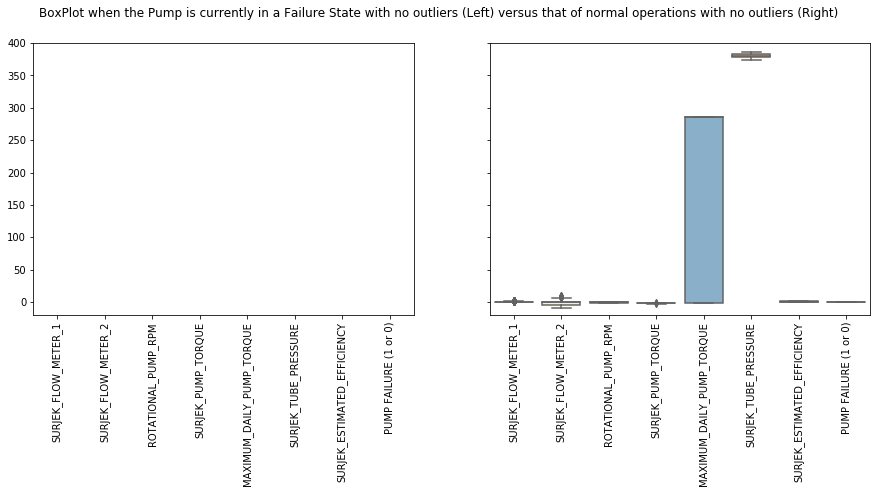

In [30]:
f, axes = plt.subplots(1, 2, sharey=True)
f.suptitle("BoxPlot when the Pump is currently in a Failure State with no outliers (Left) versus that of normal operations with no outliers (Right)")
mpl.rcParams['figure.figsize'] = (15,5)
dataframe_boxplots = no_outliers[no_outliers['PUMP FAILURE (1 or 0)']==1]
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set3', ax=axes[0])

dataframe_boxplots = no_outliers[no_outliers['PUMP FAILURE (1 or 0)']==0]
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set3', ax=axes[1])

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,400)
    plt.xticks(rotation=90)
    
plt.show()



### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 
We have provided a filtered column list for you.   

Using a loop, iterate through each of the Column Names and plot the data. (You can either make your X-axis the Timeframe variable or you can leave it blank and use the row numbers as an index). 

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

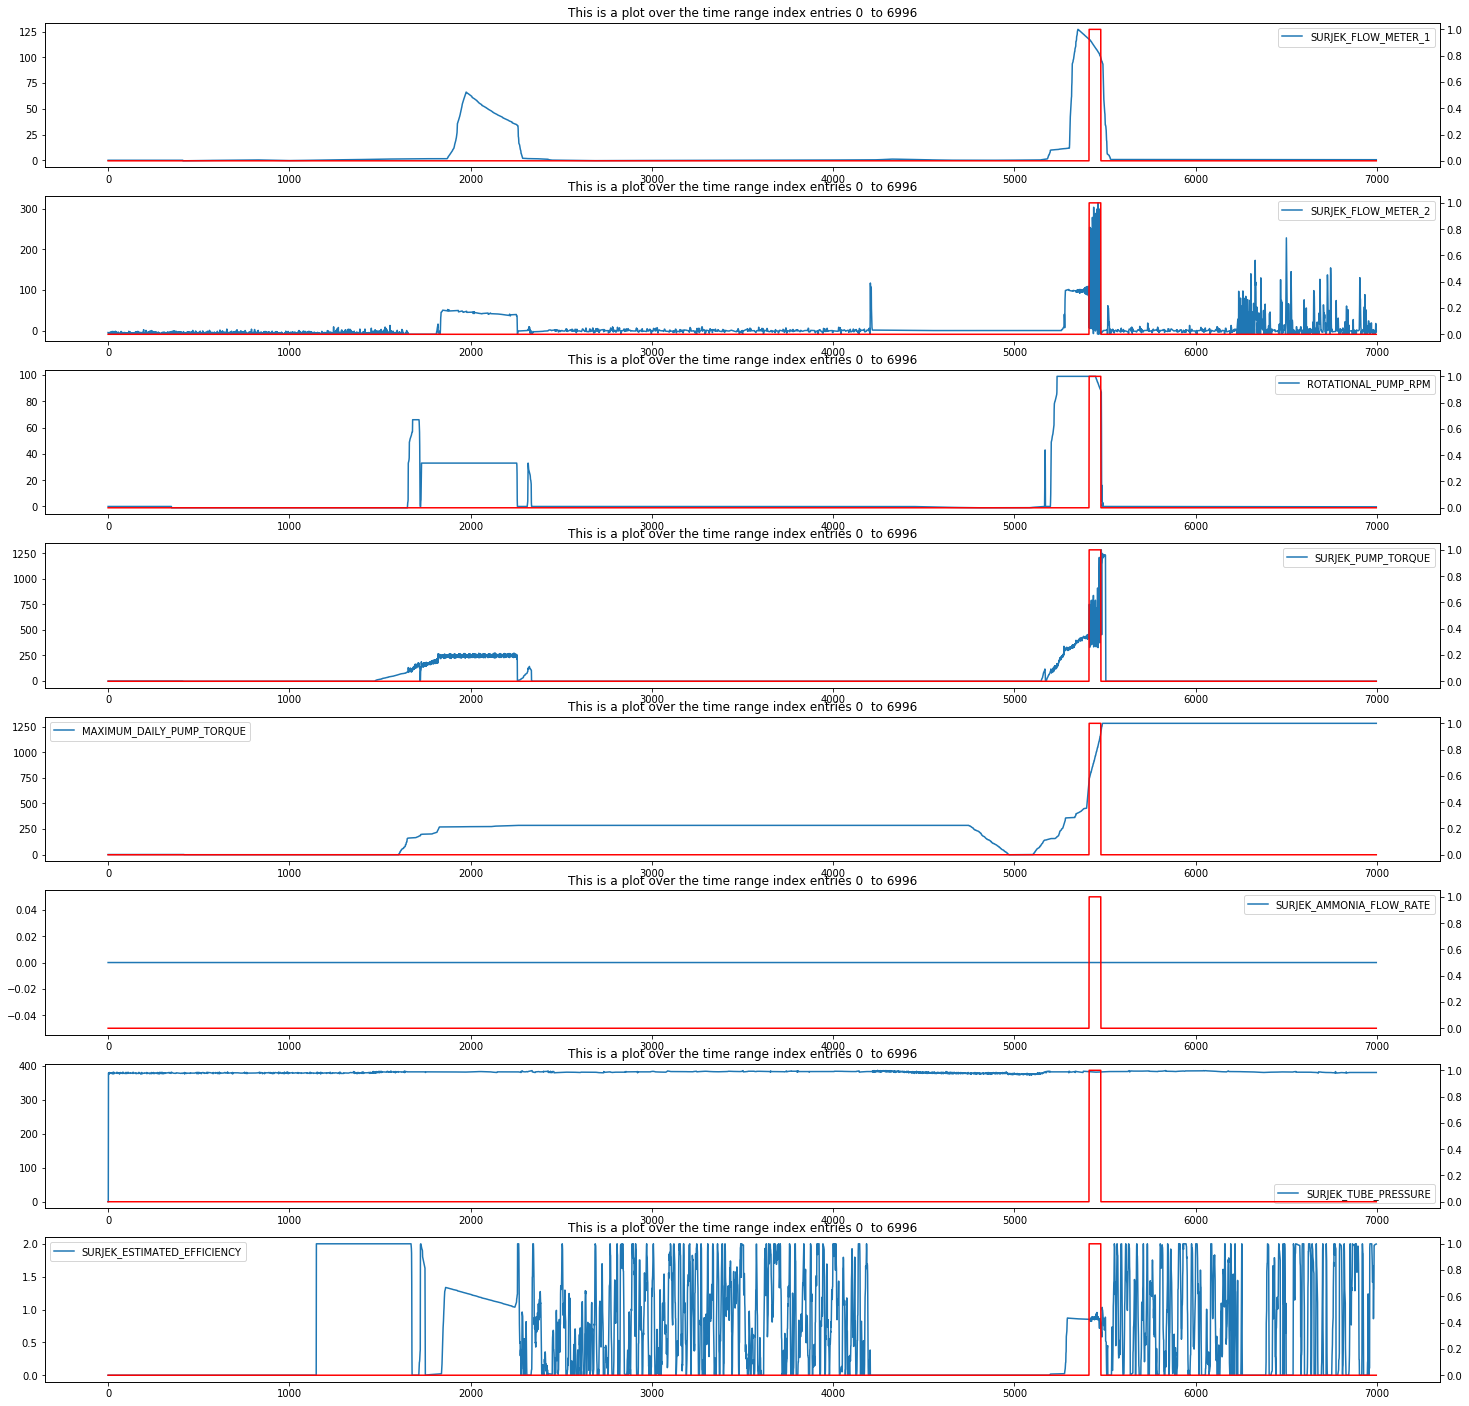

In [44]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = dataframe[filt].columns
#dataframe[TIMEFRAME.min()]
mpl.rcParams['figure.figsize'] = (25,25)

df2 = dataframe.reset_index(drop=True)
fig, ax = plt.subplots(colList.shape[0])
for i in range(colList.shape[0]):
    ax1 = ax[i]
    ax1.plot(df2.index, df2[colList[i]], label = colList[i])
    ax2 = ax1.twinx()
    ax2.plot(df2.index, df2[filt2], color = 'red')
    ax1.legend(loc='best')
    plt.tight_layout
    plt.title("This is a plot over the time range index entries " + str(df2.index.min()) + " " +  " to " + str(df2.index.max()))
plt.show()



In [25]:
mintime=df2.index.min()
mintime
maxtime=df2.index.max()
maxtime

6996


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?
surjek pump torque, max. daily pump torque, surjek flow meter 2

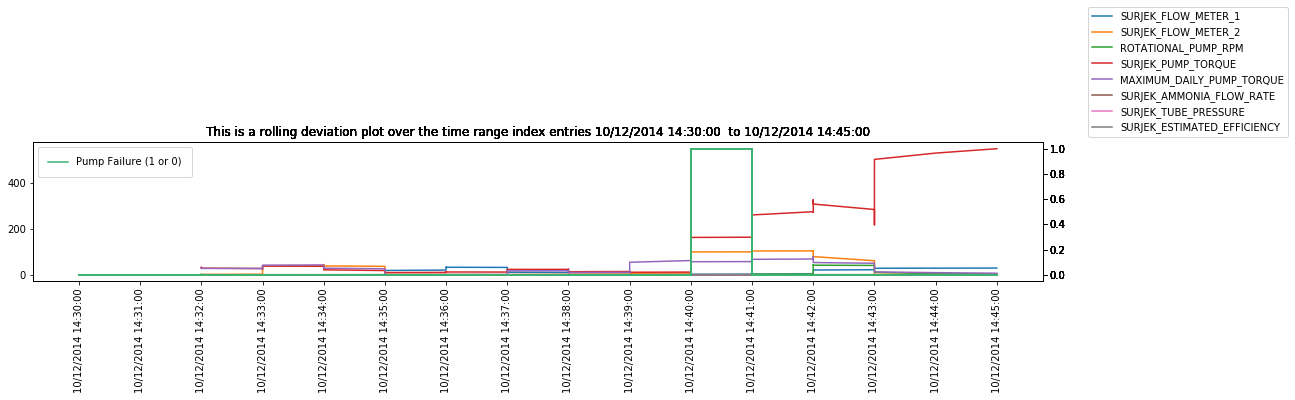

In [45]:
from datetime import datetime
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = dataframe[filt].columns
mpl.rcParams['figure.figsize'] = (15,4)
dataframe.set_index('TIMEFRAME', inplace=True)

dataframe = dataframe[(dataframe.index >= "10/12/2014 14:30:00")&(dataframe.index <="10/12/2014 14:45:00")]
rollingDF = dataframe.rolling(30).std()

colList = rollingDF[filt3].columns
rollingDF['PUMP FAILURE (1 or 0)'] = dataframe['PUMP FAILURE (1 or 0)']
fig = plt.figure()
ax = plt.axes()
date_form = mpl.dates.DateFormatter("%d/%m/%Y %H:%M:%S")
ax.xaxis.set_major_formatter(date_form)
#Loop through the Plot
for i in colList:
    ax.plot(rollingDF.index, rollingDF[i], label=i)
    ax2 = ax.twinx()
    ax2.plot(dataframe[filt2], 'mediumseagreen', label='Pump Failure (1 or 0)')
    
    ax.xaxis.set_tick_params(rotation=90)

    plt.tight_layout()
    minTime = rollingDF.index.min()
    maxTime= rollingDF.index.max()
    plt.title("This is a rolling deviation plot over the time range index entries " + str(minTime) + " " +  " to " + str(maxTime))
ax.legend(bbox_to_anchor=(1.04,1), loc="lower left")   
ax2.legend(loc='upper left', borderpad=1)
plt.show()


---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1, "Heatmap showing all variables' correlations")

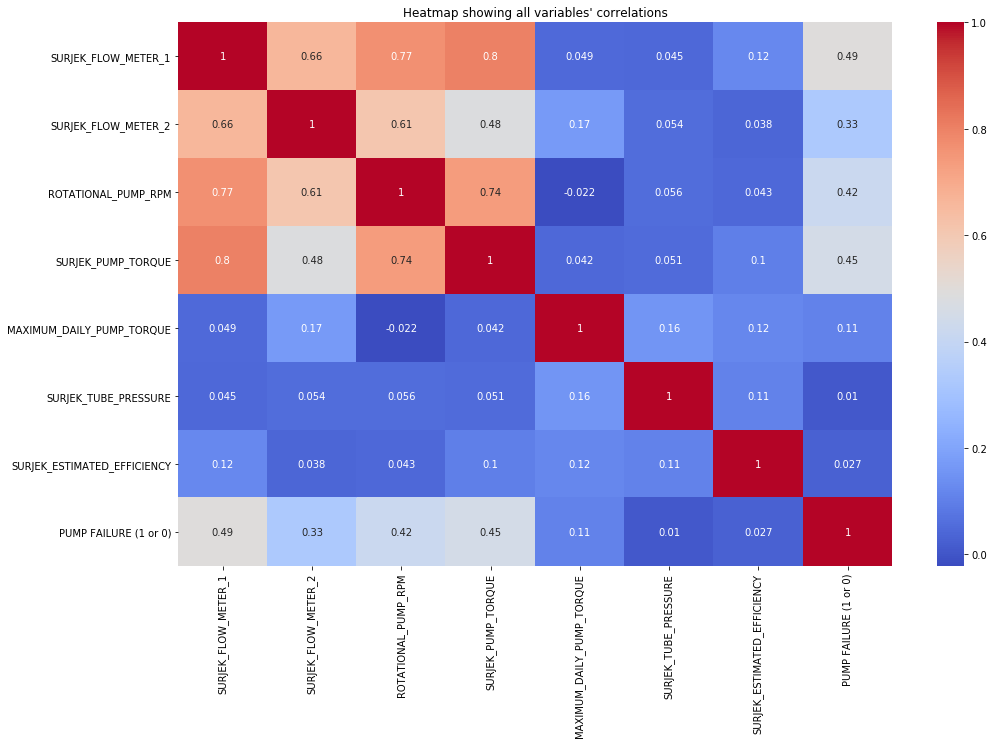

In [8]:
from datetime import datetime
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']

dataframe = dataframe[filt]
corr = dataframe.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap showing all variables' correlations")


**Open-ended Question:**

Which variables seem to correlate with Pump Failure?
Surjek_flow_meter_1, rotational_pump_rpm, surjek_pump_torque

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

Text(0.5, 1.0, 'Barplot of Correlated Features')

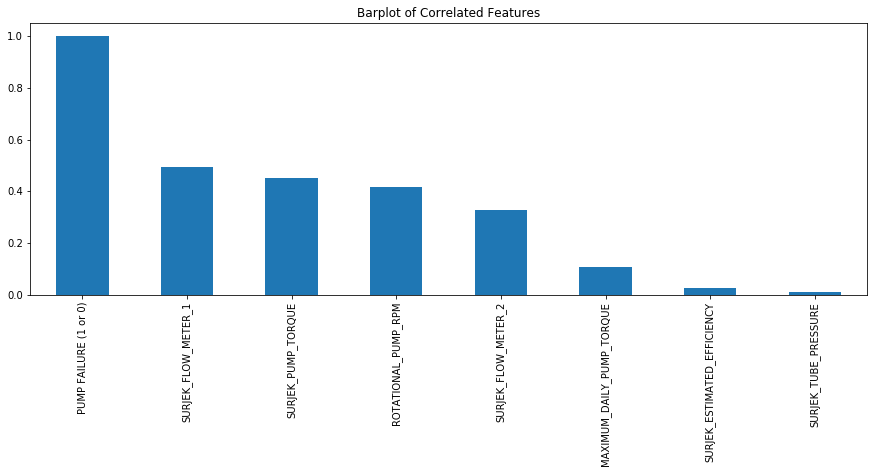

In [31]:
#dataframe.sort_values('PUMP FAILURE (1 or 0)', inplace=True)
corr = corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Barplot of Correlated Features")

---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. This time, you'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? If yes, list these out below your heatmap.



Text(0.5, 1, "Rolling standard deviation heatmap showing all variables' correlations")

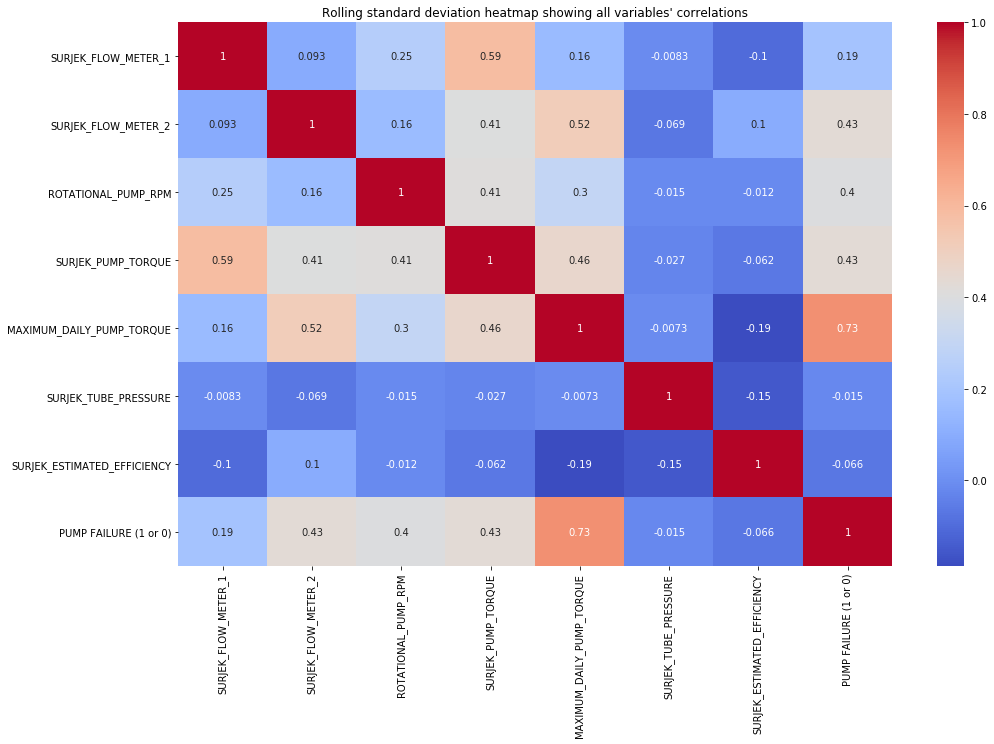

In [33]:
dataframe = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
dataframe = dataframe[filt]
rollingDF = dataframe.rolling(30).std()
corr_rolling = rollingDF.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(corr_rolling, annot=True, cmap='coolwarm')
plt.title("Rolling standard deviation heatmap showing all variables' correlations")



In [32]:
print ("max_daily_pump_torque is positively correlated to pump_failure")
print("Surjek_tube_pressure shows negative correlation with all the variables")


max_daily_pump_torque is positively correlated to pump_failure
Surjek_tube_pressure shows negative correlation with all the variables


### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

**Note:** We have provided the initial dataframe and filter list.

## Please put your code here 

In [54]:
#Answer for step i): 
#Below is the first part of the code
import numpy as np
from pandas import DataFrame
dataframe_two = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
#----write your code below------

df = DataFrame(dataframe_two, columns=filt) 
df.replace([np.inf, -np.inf], np.nan)

df.dropna(inplace=True)

X = df[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']] # here we have 8 variables for the multiple linear regression. 
Y = df['PUMP FAILURE (1 or 0)']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.264
Model:                               OLS   Adj. R-squared:                  0.264
Method:                    Least Squares   F-statistic:                     358.8
Date:                   Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                           07:11:13   Log-Likelihood:                 7547.4
No. Observations:                   6997   AIC:                        -1.508e+04
Df Residuals:                       6989   BIC:                        -1.502e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [57]:
#answer for step ii): 
#Below is the first part of the code
dataframe_two = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
#----write your code below------
dataframe_two = dataframe_two[filt]
rollingDF_two = dataframe_two.rolling(30).std()
df = DataFrame(rollingDF_two, columns=filt) 
df.replace([np.inf, -np.inf], np.nan)

df.dropna(inplace=True)

X = df[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']] # here we have 8 variables for the multiple linear regression. 
Y = df['PUMP FAILURE (1 or 0)']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)



                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.575
Model:                               OLS   Adj. R-squared:                  0.575
Method:                    Least Squares   F-statistic:                     1337.
Date:                   Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                           12:25:12   Log-Likelihood:                 15659.
No. Observations:                   6910   AIC:                        -3.130e+04
Df Residuals:                       6902   BIC:                        -3.125e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

In [67]:
dataframe_two = pd.concat([dataframe_1, dataframe_2, dataframe_3])
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
#----write your code below------

dataframe_two = dataframe_two[filt]
dataframe_two['PumpFailure'] = dependentVar
dataframe_two = dataframe_two.fillna(0)
X = dataframe_two.drop(['PUMP FAILURE (1 or 0)', 'PumpFailure'],axis=1)
X = sm.add_constant(X)
y = dataframe_two['PumpFailure']
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PumpFailure   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     622.8
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        22:42:51   Log-Likelihood:                 16172.
No. Observations:               11998   AIC:                        -3.233e+04
Df Residuals:                   11990   BIC:                        -3.227e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         5.63e-05      0.001      0.063      0.950      -0.002       0.002
SURJEK_FLOW_METER_1             0.0017   7.62e-05     22.060      0.000       0.002       0.002
SURJEK_FLOW_METER_2            -0.0001    4.4e-05     -2.738      0.006      -0.000   -3.43e-05
ROTATIONAL_PUMP_RPM             0.0003   6.23e-05      5.257      0.000       0.000       0.000
SURJEK_PUMP_TORQUE              0.0001   1.09e-05      9.160      0.000    7.87e-05       0.000
MAXIMUM_DAILY_PUMP_TORQUE     1.97e-05   1.65e-06     11.911      0.000    1.65e-05    2.29e-05
SURJEK_AMMONIA_FLOW_RATE    -4.085e-19   1.13e-19     -3.612      0.000    -6.3e-19   -1.87e-19
SURJEK_TUBE_PRESSURE         -2.94e-05   3.92e-06     -7.503      0.000   -3.71e-05   -2.17e-05
SURJEK_ESTIMATED_EFFICIENCY    -0.0054      0.001     -5.314      0.000      -0.007      -0.003
==============================================================================
Omnibus:                    16240.255   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5041940.924
Skew:                           7.699   Prob(JB):                         0.00
Kurtosis:                     102.240   Cond. No.                     4.38e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

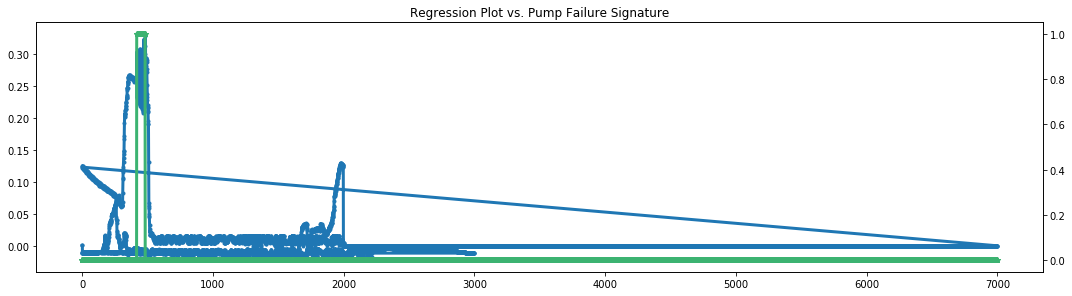

In [68]:
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()
mpl.rcParams['figure.figsize'] = (15,4)
#----write your code below------

ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(dataframe_two.PumpFailure, 'mediumseagreen', linewidth=3, marker='*')
#ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.title("Regression Plot vs. Pump Failure Signature")
plt.show()

You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now fluent in Python for data analysis! Congratulations!